In [1]:
# Import the required libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plot the adjusted closing prices of multiple ETFs over a given period.

    Parameters:
    tickers (list): List of ETF tickers (e.g., ['SPY', 'SPDN']).
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Download historical data for the tickers
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Ensure 'Adj Close' or 'Close' column exists
    if "Adj Close" in data.columns:
        data = data["Adj Close"]
    elif "Close" in data.columns:
        data = data["Close"]
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the data.")

    # Normalize prices to start at 100 for better comparison
    normalized_data = (data / data.iloc[0]) * 100

    # Plot the normalized data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    # Add title, labels, legend, and grid
    plt.title("SPY vs. SPDN Performance Comparison (2024)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
    plt.legend(tickers, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

In [3]:
# Set the tickers and time range
tickers = ["SPY", "SPDN"]
start_date = "2024-01-01"
end_date = "2024-12-31"

In [4]:
# Download and inspect the data structure
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())
print("Columns available:", data.columns)

Price           Close                   High                    Low  \
Ticker           SPDN         SPY       SPDN         SPY       SPDN   
Date                                                                  
2024-01-02  12.722627  466.664001  12.779678  467.671103  12.694101   
2024-01-03  12.827223  462.852875  12.836732  465.222473  12.760662   
2024-01-04  12.884275  461.361969  12.884275  464.995355  12.779679   
2024-01-05  12.855750  461.993896  12.903293  464.481970  12.793943   
2024-01-08  12.694101  468.589264  12.855749  468.737358  12.675084   

Price                        Open               Volume             
Ticker             SPY       SPDN         SPY     SPDN        SPY  
Date                                                               
2024-01-02  464.531354  12.732136  466.180217  1949000  123623700  
2024-01-03  462.240732  12.779679  464.472089  7259600  103585900  
2024-01-04  461.134871  12.846241  462.369040  4942200   84232200  
2024-01-05  460.522747 

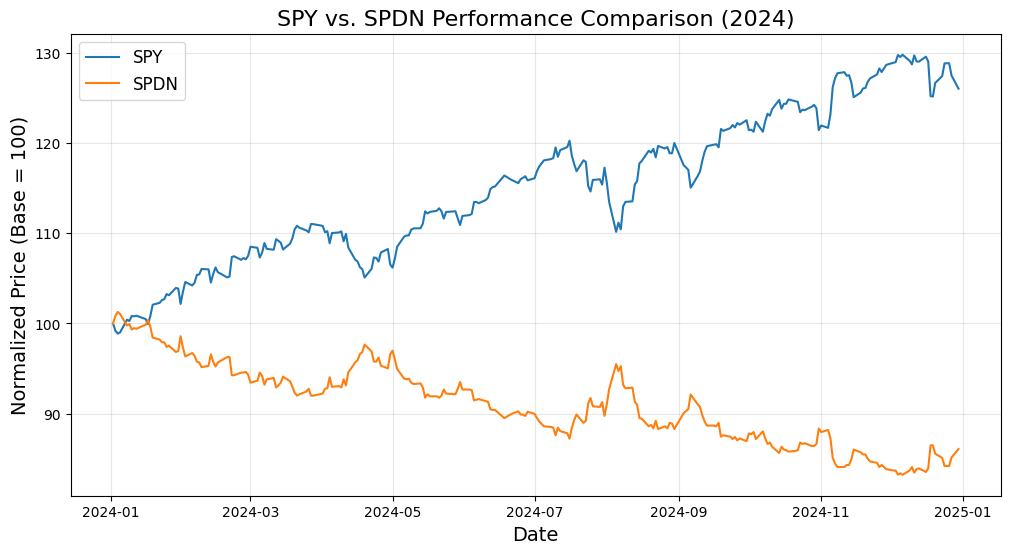

In [5]:
# Call the function to plot the comparison
plot_etfs_comparison(tickers, start_date, end_date)